In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns
%matplotlib inline

1780264117.1588287269    24
1952709213.1586711979    24
1907336411.1588286903    24
1687884283.1544397112    16
1633059543.1588187577     8
1935361641.1588287568     5
213501704.1586953830      2
Name: analytics_client_id, dtype: int64


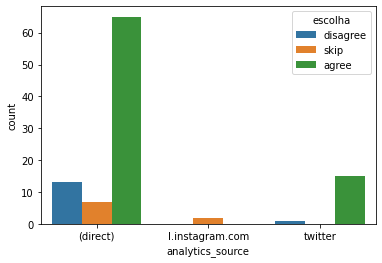

In [28]:
# EJ(votos) + Mautic(contatos) + Dados gerais de Analytics
df1 = pd.read_csv('/tmp/airflow/ej_analytics_mautic.csv',dtype={'analytics_client_id': str})

df1.dropna(subset=['analytics_source', 'analytics_medium', 'pageview'], inplace=True)

# number of unique analytics_client_id in df1 with valid analytics data
print(df1['analytics_client_id'].value_counts())

sns.countplot(x="analytics_source", hue="escolha", data=df1)